In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize the p_estimate with high values instead of 0
class BanditArm():
    def __init__(self , p):
        self.p = p
        self.p_estimate = 5
        self.N = 1
    
    # randomly generating 1 with probability p
    def pull(self):
        return np.random.random() < self.p
    
    # updating the running mean
    # Xn = ((N - 1)Xn-1 + X)/N
    # where Xn-1 - previous mean , Xn - current mean , X - current data
    def update(self , x):
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x)/self.N

In [ ]:
NUM_TRAILS = 10000
Bandit_probabilities = [0.2 , 0.35 , 0.6]

Mean Estimate  0.5555555555555556
Mean Estimate  0.5588235294117647
Mean Estimate  0.6051204819277106
Total reward Earned  6036
Overall win rate  0.6036
Number of times optimal bandit Selected  9959
Number of times each Bandit selected [9, 34, 9960]


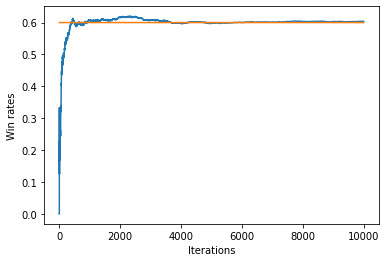

In [ ]:
rewards = []
num_optimal = 0

optimal_j = np.argmax(Bandit_probabilities)

bandits = [BanditArm(b) for b in Bandit_probabilities]

for i in range(NUM_TRAILS):
    j = np.argmax([b.p_estimate for b in bandits])
    
    if optimal_j == j:
        num_optimal += 1

    x = bandits[j].pull()
    rewards.append(x)
    bandits[j].update(x)

for b in bandits:
    print("Mean Estimate ", b.p_estimate)

print("Total reward Earned " , sum(rewards))
print("Overall win rate " , sum(rewards)/len(rewards))
print("Number of times optimal bandit Selected ", num_optimal)
print("Number of times each Bandit selected" , [b.N for b in bandits])

#plot the results
cumsum = np.cumsum(rewards)
winrates = cumsum / (np.arange(NUM_TRAILS) + 1)
plt.plot(winrates)
plt.plot(np.ones(NUM_TRAILS)*np.max(Bandit_probabilities))
plt.xlabel("Iterations")
plt.ylabel("Win rates")
plt.show()

#conclusion:
##From the graph , we can see that overall winrate is very closer to the true win rate
##The estimated mean of sub-optimal bandits are not closer to the true mean , only the optimal bandit mean is closer to true mean.
##we can see that optimal bandit is selected 99% of the time.